In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

C:\Users\penthotal\Desktop\git_repositories\bayesian_ANN


In [24]:
from tensorflow.keras.datasets.imdb import load_data as load_imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import StratifiedShuffleSplit

import pymc3 as pm

from modules.neural_networks import BayesianWordEmbedding

from modules.viz_utils import visulize_categorical_post, visulize_bernoulli_post, visualize_embedding

# Sentiment Classification With Words Embedding

In [34]:
(X_tr, y_tr), (X_ts, y_ts) = load_imdb(
    skip_top=100,
    num_words=4000,
    maxlen=30
)
X_tr = pad_sequences(X_tr, padding='post', value=2)
X_tr = X_tr
X_ts = pad_sequences(X_ts, padding='post', value=2)
X_ts = X_ts

mapper = {2: 0}
code = 1
for element in np.unique(X_tr):
    if element == 2:
        continue
    mapper[element] = code
    code += 1

def mapper_func(x, mapper=mapper):
    try:
        return mapper[x]
    except:
        return 0
    
X_tr = np.vectorize(mapper_func)(X_tr)
X_ts = np.vectorize(mapper_func)(X_ts)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

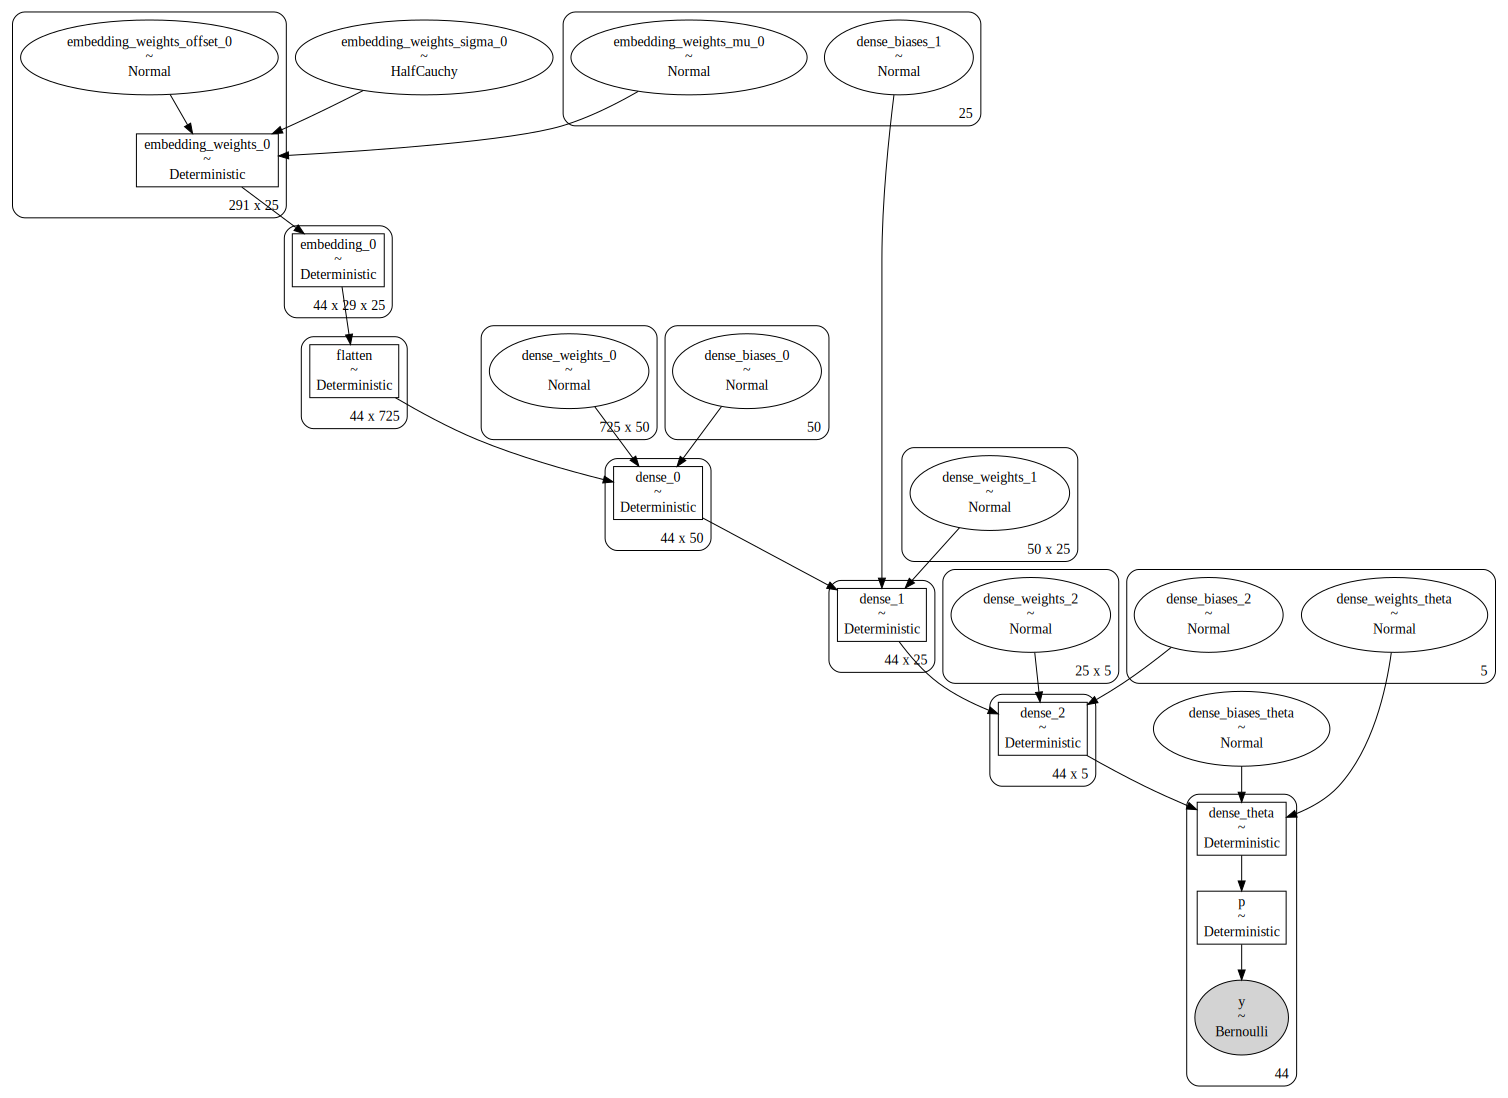

In [39]:
embedding_model = BayesianWordEmbedding(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='bernoulli_lk',
    vocabulary_size=int(X_tr.max()+1), 
    embedding_size=25, 
    prior=pm.Normal,
    layers=(50, 25, 5),
    activation='tanh', 
    batch_size=32,
    mu=0,
    sigma=0.1,
    beta=2,
    priors_dict={
        'mu': 0,
        'sigma': 0.1
    }
)
embedding_model.show_graph()

In [40]:
embedding_model.fit(n=50000)
embedding_trace = embedding_model.predict(
    X_ts, 
    y_ts, 
    ['embedding_weights_0', 'p']
)

Finished [100%]: Average Loss = 285.15


In [ ]:
pm.plot_trace(embedding_trace, var_names=['embedding_weights_0'])

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\arviz\data\base.py:169: UserWarning: More chains (1000) than draws (291). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\arviz\data\base.py:169: UserWarning: More chains (1000) than draws (48). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


In [33]:
embedding_trace['p'].mean(0).max()

0.5783993320663189